# 


The CSTR Design Equation is $V=\frac{F_{A,0}X}{-r_A}$. Since the reaction involves second order kinetics (deduced from the units of the frequency factor) and the feed concentrations of A and B are the same, the DE can be simplified to $V=\frac{vX}{kC_0(1-X)^2}$ where $C_0=C_{A,0}=C_{B,0}$. This can be rearranged to give the quadratic $0 = Da-X(1+2Da)+DaX^2$ where $Da = \frac{kVC_{0}}{v}$ (Damkohler number) and $k = e^{\frac{-E_a}{RT}}$ (Arrhenius equation). For part (b), the equation can be rearranged to give $v=\frac{kVC_{0}(1-X)^2}{X}$, where $X$ is the conversion calculated in part (a). The Python code below was used to complete question 1: 







In [1]:
from numpy import *
#function to complete Q1 using derivations
def Q1(Ca0,Cb0,v,V,Ea,A,T,T2):
    R = 8.314 #J/mol/K
    k = A*exp(-Ea/(R*T)) #Arrhenius
    Da = (k*V*Cb0)/v #Damkohler, 2nd Order CSTR
    p = [Da,-1*(1+2*Da),Da] 
    Xarray = roots(p) 
    #for loop to filter zeroes of quadratic
    for n in range(1,2): 
        if Xarray[n]<1 and Xarray[n]>0:
            X=Xarray[n]
    k2 = A*exp(-Ea/(R*T2)) #Arrhenius for part (b)
    v2 = (k2*V*Cb0*((1-X)**2)/X)
    return X,v2
Ans = Q1(0.15,0.15,2.1,1300.0,32000.0,953.0,370.0,380.0)
print("1(a) - The conversion achieved is",str(round(Ans[0],3)*100),"%") 
print("1(b) - The volumetric flowrate required to achieve the conversion in (a) is",str(round(Ans[1],3)),"L/s") 

1(a) - The conversion achieved is 54.8 %
1(b) - The volumetric flowrate required to achieve the conversion in (a) is 2.761 L/s


#

We can determine a rate law for the liquid phase reaction A + 2B$\rightarrow$C using the concentration of A dissolved in B (a function of time) and the fact that the reaction takes place in an isothermal batch reactor. Given that this is a batch reactor: $\frac{dC_A}{dt}=r_A$.
The spectrometer data only measures the concentration of A. If we assume that the reaction is independent of species B ($C_B$), we can construct the relationships below. If any of the plots are linear, then the assumption that B has little to no effect on the rate law is justified (i.e. the reaction is zeroth order with respect to B or the concentration of B can be considered to be constant).


For a zeroth order reaction: $\frac{dC_A}{dt}=-k$. As such, $C_A=-kt+C_{A,0}$. Plot $C_A$ vs t.

For a first order reaction: $\frac{dC_A}{dt}=-kC_A$. As such, $ln(C_A)=-kt+ln(C_{A,0})$. Plot $ln(C_A)$ vs t

For a second order reaction: $\frac{dC_A}{dt}=-kC_A^2$. As such, $\frac{1}{C_A} - \frac{1}{C_{A,0}}=kt$. Plot $\frac{1}{C_A}$ vs t


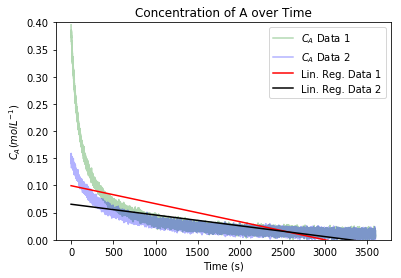

In [1]:
%matplotlib inline 
from matplotlib.pylab import *
t, d1, d2 = loadtxt("data-z5076823.csv", skiprows=1, delimiter=',', unpack=True)
#linear regression - zeroth order, first data set 
A= vstack([ones(len(t)),t]).T
b=vstack(d1)
c1,m1 = lstsq(A,b)[0]
#linear regression - zeroth order, second data set 
A= vstack([ones(len(t)),t]).T
b=vstack(d2)
c2,m2 = lstsq(A,b)[0]

#zeroth order plot with least squares solution
plot(t, d1,'g-',aa='True',alpha=0.3,label='$C_A$ Data 1')
plot(t, d2,'b-',aa='True',alpha=0.3,label='$C_A$ Data 2')
plot(t,m1*t+c1,'r-',aa='True',label='Lin. Reg. Data 1')
plot(t,m2*t+c2,'k-',aa='True',label='Lin. Reg. Data 2')
ylim(0,0.4)
title('Concentration of A over Time')
ylabel('$C_A  (molL^{-1})$')
xlabel('Time (s)')
legend()
show()

It is evident that the reaction is not zeroth order with respect to species A (the plots for the data sets are not linear). Due to noisier data as t $\rightarrow \infty$, and as concentrations equal to or less than 0 appear as t$\rightarrow \infty$, the data should be truncated. As is evident in the code below, the data was arbitrarily truncated to exclude concentration measurements after 1500s.

In [7]:
#truncation and filter too remove zero values
T= []
D1T=[]
D2T=[]
n= 0
while t[n]<1500.0:
    T.append(t[n])
    D1T.append(d1[n])
    D2T.append(d2[n])
    n=n+1
D1 = [x for x in D1T if x != 0.0]
D2 = [y for y in D2T if y != 0.0]
#linear regression - first order, first data set 
A= vstack([ones(len(T)),T]).T
b= vstack(log(D1))
c3,m3 = lstsq(A,b)[0]
#linear regression - first order, second data set 
A= vstack([ones(len(T)),T]).T
b=vstack(log(D2))
c4,m4 = lstsq(A,b)[0]
#first order plot with least squares solution
plot(T, log(D1),'g-',aa='True',alpha=0.3,label='$log(C_A)$ Data 1')
plot(T, log(D2),'b-',aa='True',alpha=0.3,label='$log(C_A)$ Data 2')
plot(T,m3*T+c3,'r-',aa='True',label='Lin. Reg. Data 1')
plot(T,m4*T+c4,'k-',aa='True',label='Lin. Reg. Data 2')
title('log(Concentration of A) over Time')
ylabel('$log(C_A)$')
xlabel('Time (s)')
legend()
show()

As the plots of the data sets are not linear, the equation is not first order with respect to species A

In [8]:
#linear regression - second order, first data set 
A= vstack([ones(len(T)),T]).T
b= vstack(divide(1.0,D1))
c5,m5 = lstsq(A,b)[0]
#linear regression - second order, second data set 
A= vstack([ones(len(T)),T]).T
b= vstack(divide(1.0,D2))
c6,m6 = lstsq(A,b)[0]

#second order plot with least squares solution
plot(T, divide(1.0,D1),'g-',aa='True',alpha=0.4,label='$1/(C_A)$ Data 1')
plot(T, divide(1.0,D2),'b-',aa='True',alpha=0.3,label='$1/(C_A)$ Data 2')
plot(T,m5*T+c5,'r-',aa='True',label='Lin. Reg. Data 1')
plot(T,m6*T+c6,'k-',aa='True',label='Lin. Reg. Data 2')
title('1/(Concentration of A) over Time')
ylabel('$1/(C_A)$')
xlabel('Time (s)')
legend()
show()

Despite noisy data, it appears as though there is a linear correlation between $\frac{1}{C_A}$ and $t$. As such, the rate law for the reaction is second order with respect to A. The linearity of the fit suggests that the rate law is independent of species B, or that the reaction is pseudo-second order (the concentration of B is so large that it can effectively be considered constant). In the latter case, the $C_B$ term in the rate law can be absorbed into the rate coefficient $k$. As such, it seems appropriate to construct the rate law $r_A=k'C_A^2$. $k'$ can be calculated from the average of the gradients of the linear regression fits for each data set:

In [24]:
karray = [m5,m6]
print("k'=",round(mean(karray),4),"L/mol/s")

k'= 0.0258 L/mol/s


#

Three configurations are possible using an exisitng CSTR and a new tubular reactor. If the reactors are arranged in series, the CSTR or the tutbular reactor can be first in the process. The third configuration  would be to have the reactors in parallel. The volume of the new tubular reactor is a measure we can use to gauge the worth of a particular configuration - larger reactors entail higher entail capital costs and require more plant space. Furthermore, we need to calculate and compare the minimum tubular reactor volume for each configuration. To do this, we need to include the *minimum* conversion required as a parameter (smaller conversion means smaller volume as is evident in Levenspiel plots). From the calculations, the volume of the tubular reactor in the parallel configuration is larger than the volumes of the tubular reactors in series (as expected) - we can immediately discard this option without calculating if the minimum conversion can be achieved by the CSTR. However, there is no significant difference between the volumes of the tubular reactor in the series configurations. As such, the decision was made to put the 3kL CSTR first in the process (followed by a 1.53kL PFR) as doing so would enable the feed to be thoroughly mixed before proceeding to the tubular reactor (assumed to have plug flow).

##Calculations

###Assumptions
Steady state operation. Isothermal, constant density in reactors. Reaction is first order with respect to tert-butyl bromide and first order overall. The rate of the reversible reaction is negligible. Perfect mixing in the CSTR. Plug flow through the tubular reactor (perfect radial mixing, no axial mixing). Parallel config requires same output concentration from each reactor.



###Procedure

Since the reaction proceeds via an SN1 mechanism, we can assume that the reaction is first order with respect to tert-butyl bromide (TBB). This is supported by the fact that the units of $k$ denote that the rate law is first order. As such, the rate law is $r_{TBB}=-kC_{TBB}$. Given a product (tert-butanol, or TB) flowrate, we can work out the volumetric flowrate for a series configuration (this can be divided by two to give the volumetric flowrate through each reactor in a parallel configuration): $F_{c,2}=2500\times 10^3 \frac{g}{week} \times \frac{1mol}{74.12g}$ (MW of TB). With this, we can now construct equations to calculate the volume of the PFR for each configuration.

###CSTR First

Considering that the reaction is first order, we can work out the conversion after the CSTR using the Damkohler number of the reactor: $X_1 = \frac{Da}{Da+1}$, where $Da = \frac{kV}{v}$. The DE for the PFR is $V = F_{A,0} \int_{X_1}^{X_2} \frac{dX}{-r_A}=\frac{v}{k}\int_{X_1}^{X_2} \frac{dX}{1-X}=-\frac{v}{k}ln(\frac{1-X_2}{1-X1})$.

###PFR First

The DE for the CSTR is $V=\frac{F_{A,0}(X_2-X_1)}{-r_A}=\frac{v(X_2-X_1)}{k(1-X_2)}$. This can be rearranged to give $X_1=X_2-Da+DaX_2$ where $Da=\frac{kV}{v}$. The DE of the PFR in this case is $V=\frac{-v ln(1-X_1)}{k}$.

###Reactors in Parallel

The DE for the PFR is $V=\frac{-0.5v}{k} \times log(1-X_2)$.

In [3]:
from numpy import *
def Q3(mFc2,k,mCa,X2,VCSTR,MWtb,MWtbb):
    Fc2 = mFc2/MWtb/7/24/60 #convert product mass flowrate (per week) into molar flowrate (per minute)
    Fa0 = Fc2/X2
    #CSTR first config
    v=Fa0/mCa*MWtbb
    DaCSTR = k*VCSTR/v
    X1 = (DaCSTR)/(1+DaCSTR)
    VPFR1 = -v/k*(log((1-X2)/(1-X1)))
    print('The volume of the PFR for the first configuration (CSTR first) is',str(round(VPFR1,2)),'L')
    #PFR first config
    X1 = X2-DaCSTR+DaCSTR*X2
    VPFR2=-v/k*log(1-X1)
    print('The volume of the PFR for the second configuration (PFR first) is',str(round(VPFR2,2)),'L')
    #CSTR and PFR in ||
    VPFR3=-(0.5*v)/k*log(1-X2)
    print('The volume of the PFR for the third confifguration (PFR first) is',str(round(VPFR3,2)),'L')
Q3(2500.0e3,1.53e-2,15.8,0.75,3000.0,74.12,137.02)  

The volume of the PFR for the first configuration (CSTR first) is 1527.59 L
The volume of the PFR for the second configuration (PFR first) is 1527.59 L
The volume of the PFR for the third confifguration (PFR first) is 1752.85 L
